In [ ]:
!pip install umap-learn
!pip install hdbscan

In [ ]:
import hdbscan
import pandas as pd
import numpy as np
import umap
from pandas.util import hash_pandas_object
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
grades = pd.read_excel("Оценки 2018-2022 ПМИ.xlsx")
grades.head()

,Номер студенческого билета,Оценка (10 баллов),Оценка (5 баллов) текстовая,Зачет/Незачет,Оценка (5 баллов),Неявка,Дата сдачи,Ведомость,Вид попытки,Считать результатом до пересдач,Образовательная программа студента
0,М161БПМИИ019,10.0,отлично,зачтено,5.0,(Нет),43362,02.26/2018.1-3,сдача,Да,Прикладная математика и информатика
1,М181БПМИИ058,7.0,хорошо,зачтено,4.0,(Нет),43362,02.26/2018.1-3,сдача,Да,Прикладная математика и информатика
2,М161БПМИИ088,9.0,отлично,зачтено,5.0,(Нет),43362,02.26/2018.1-3,сдача,Да,Прикладная математика и информатика
3,М161БПМИИ100,7.0,хорошо,зачтено,4.0,(Нет),43362,02.26/2018.1-3,сдача,Да,Прикладная математика и информатика
4,М161БПМИИ151,9.0,отлично,зачтено,5.0,(Нет),43362,02.26/2018.1-3,сдача,Да,Прикладная математика и информатика


In [ ]:
grades = grades.loc[grades["Номер студенческого билета"].str.startswith('М18') == True]
grades

,Номер студенческого билета,Оценка (10 баллов),Оценка (5 баллов) текстовая,Зачет/Незачет,Оценка (5 баллов),Неявка,Дата сдачи,Ведомость,Вид попытки,Считать результатом до пересдач,Образовательная программа студента
1,М181БПМИИ058,7.0,хорошо,зачтено,4.0,(Нет),43362,02.26/2018.1-3,сдача,Да,Прикладная математика и информатика
5,М181БПМИИ098,7.0,хорошо,зачтено,4.0,(Нет),43392,02.26/2018.1-14,сдача,Да,Прикладная математика и информатика
8,М181БПМИИ264,10.0,отлично,зачтено,5.0,(Нет),43393,02.26/2018.1-20,сдача,Да,Прикладная математика и информатика
9,М181БПМИИ071,6.0,хорошо,зачтено,4.0,(Нет),43393,02.26/2018.1-19,сдача,Да,Прикладная математика и информатика
10,М181БПМИИ303,6.0,хорошо,зачтено,4.0,(Нет),43393,02.26/2018.1-24,сдача,Да,Прикладная математика и информатика
...,...,...,...,...,...,...,...,...,...,...,...
36851,М181БПМИИ227,1.0,неудовлетворительно,не зачтено,2.0,(Нет),44834,02.26/2021.4-1074,пересдача,Нет,Прикладная математика и информатика
36898,М181БПМИИ307,0.0,неудовлетворительно,не зачтено,0.0,(Нет),44839,02.26/2021.4-1258,пересдача комиссии,Нет,Прикладная математика и информатика
36901,М181БПМИИ195,4.0,удовлетворительно,зачтено,3.0,(Нет),44839,02.26/2021.4-1257,пересдача,Нет,Прикладная математика и информатика
36904,М181БПМИИ107,0.0,неудовлетворительно,не зачтено,0.0,(Нет),44839,02.26/2021.4-1257,пересдача,Нет,Прикладная математика и информатика


In [ ]:
grades = grades.drop(columns=["Оценка (5 баллов) текстовая", "Зачет/Незачет", "Оценка (5 баллов)",
                              "Неявка", "Дата сдачи", "Вид попытки", "Считать результатом до пересдач",
                              "Образовательная программа студента"])
grades = grades.rename(columns = {"Ведомость":"Номер ведомости"})
grades

,Номер студенческого билета,Оценка (10 баллов),Номер ведомости
1,М181БПМИИ058,7.0,02.26/2018.1-3
5,М181БПМИИ098,7.0,02.26/2018.1-14
8,М181БПМИИ264,10.0,02.26/2018.1-20
9,М181БПМИИ071,6.0,02.26/2018.1-19
10,М181БПМИИ303,6.0,02.26/2018.1-24
...,...,...,...
36851,М181БПМИИ227,1.0,02.26/2021.4-1074
36898,М181БПМИИ307,0.0,02.26/2021.4-1258
36901,М181БПМИИ195,4.0,02.26/2021.4-1257
36904,М181БПМИИ107,0.0,02.26/2021.4-1257


In [ ]:
state = pd.read_excel("Все ведомости 2018-2022.xlsx")
state = state.drop(columns=["Учебный год", "Дата ведомости", "Факультет", "Вид испытания", 
                            "Преподаватель", "Вид ведомости", "Кафедра", "Вид записи плана",
                            "Вид дисциплины",  "Индекс", "Языковая группа", "Страновая специализация", "Руководитель курсовой работы",
                            "Предметная единица", "Вид предметной единицы", "Подгруппа", "Порядковый номер",
                            "E-mail для отправки результатов", "Группа студентов", "Группа на дату формирования ведомости"])
state = state.iloc [1:, :]
state.head()

,Номер ведомости,Запись учебного плана
1,01.91.01.02/2018.4-190,Основы программирования в Python
2,01.91.01.02/2018.4-300,Анализ сетевых структур
3,01.91.01.02/2018.4-301,Современные методы принятия решений
4,01.91.01.02/2018.4-302,Введение в методы машинного обучения и майнинг...
5,01.91.01.02/2018.4-308,Распределенные базы и хранилища данных


In [ ]:
df = pd.merge(state, grades, left_on="Номер ведомости", right_on="Номер ведомости")
df

,Номер ведомости,Запись учебного плана,Номер студенческого билета,Оценка (10 баллов)
0,02.26/2018.4-1038,Алгоритмы и структуры данных,М181БПМИИ304,3.0
1,02.26/2018.4-1038,Алгоритмы и структуры данных,М181БПМИИ299,3.0
2,02.26/2018.4-195,Практикум по математическому анализу 2,М181БПМИИ053,10.0
3,02.26/2018.4-195,Практикум по математическому анализу 2,М181БПМИИ153,9.0
4,02.26/2018.4-195,Практикум по математическому анализу 2,М181БПМИИ256,6.0
...,...,...,...,...
8357,02.26/2021.2-9,Глубинное обучение,М181БПМИИ007,0.0
8358,02.26/2021.2-903,Анализ данных секвенирования,М181БПМИИ107,0.0
8359,02.26/2021.2-904,Байесовские методы в машинном обучении,М181БПМИИ283,0.0
8360,02.26/2021.2-915,Глубинное обучение,М181БПМИИ307,0.0


In [ ]:
df.isna().sum()

Номер ведомости                 0
Запись учебного плана           0
Номер студенческого билета      0
Оценка (10 баллов)            207
dtype: int64

In [ ]:
df = df.dropna()
df

,Номер ведомости,Запись учебного плана,Номер студенческого билета,Оценка (10 баллов)
0,02.26/2018.4-1038,Алгоритмы и структуры данных,М181БПМИИ304,3.0
1,02.26/2018.4-1038,Алгоритмы и структуры данных,М181БПМИИ299,3.0
2,02.26/2018.4-195,Практикум по математическому анализу 2,М181БПМИИ053,10.0
3,02.26/2018.4-195,Практикум по математическому анализу 2,М181БПМИИ153,9.0
4,02.26/2018.4-195,Практикум по математическому анализу 2,М181БПМИИ256,6.0
...,...,...,...,...
8357,02.26/2021.2-9,Глубинное обучение,М181БПМИИ007,0.0
8358,02.26/2021.2-903,Анализ данных секвенирования,М181БПМИИ107,0.0
8359,02.26/2021.2-904,Байесовские методы в машинном обучении,М181БПМИИ283,0.0
8360,02.26/2021.2-915,Глубинное обучение,М181БПМИИ307,0.0


In [ ]:
student_number = len(pd.unique(df["Номер студенческого билета"]))
student_number

259

In [ ]:
df = df.drop(columns=["Номер ведомости"])
df = df.rename(columns = {"Запись учебного плана":"Предмет", "Оценка (10 баллов)":"Оценка"})
df

,Предмет,Номер студенческого билета,Оценка
0,Алгоритмы и структуры данных,М181БПМИИ304,3.0
1,Алгоритмы и структуры данных,М181БПМИИ299,3.0
2,Практикум по математическому анализу 2,М181БПМИИ053,10.0
3,Практикум по математическому анализу 2,М181БПМИИ153,9.0
4,Практикум по математическому анализу 2,М181БПМИИ256,6.0
...,...,...,...
8357,Глубинное обучение,М181БПМИИ007,0.0
8358,Анализ данных секвенирования,М181БПМИИ107,0.0
8359,Байесовские методы в машинном обучении,М181БПМИИ283,0.0
8360,Глубинное обучение,М181БПМИИ307,0.0


In [ ]:
id = hash_pandas_object(df["Номер студенческого билета"], index=False, categorize=True)
df["id"] = id
df

,Предмет,Номер студенческого билета,Оценка,id
0,Алгоритмы и структуры данных,М181БПМИИ304,3.0,8889900325791017288
1,Алгоритмы и структуры данных,М181БПМИИ299,3.0,13953175650191783523
2,Практикум по математическому анализу 2,М181БПМИИ053,10.0,4500176112568038752
3,Практикум по математическому анализу 2,М181БПМИИ153,9.0,11860257015020921279
4,Практикум по математическому анализу 2,М181БПМИИ256,6.0,12970231330059875158
...,...,...,...,...
8357,Глубинное обучение,М181БПМИИ007,0.0,14714980224934043140
8358,Анализ данных секвенирования,М181БПМИИ107,0.0,7353746595378349276
8359,Байесовские методы в машинном обучении,М181БПМИИ283,0.0,16206220508047667344
8360,Глубинное обучение,М181БПМИИ307,0.0,17947246888966067913


In [ ]:
courses = list(pd.unique(df["Предмет"]))
courses.insert(0, "id")
ids = list(pd.unique(df["Номер студенческого билета"]))

In [ ]:
df = df.drop(columns=["Номер студенческого билета"])

In [ ]:
df1 = df.groupby([df["id"], df["Предмет"]])

In [ ]:
df_dict = {k:-np.ones(len(ids)) for k in courses}

In [ ]:
id_prev = 0
curr_id = -1
for (id, course), grade in df1.groups.items():
  if id != id_prev:
    curr_id += 1
    df_dict["id"][curr_id] = id
    id_prev = id
  grade = df[(df["id"] == id) & (df["Предмет"] == course)]["Оценка"].values[0]
  df_dict[course][curr_id] = grade

In [ ]:
data = pd.DataFrame(df_dict)
data = data.drop("id", axis=1)
data = data.dropna()
data = data.T
data

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
Алгоритмы и структуры данных,8.0,4.0,7.0,8.0,3.0,4.0,5.0,9.0,6.0,7.0,...,-1.0,9.0,9.0,6.0,7.0,9.0,6.0,8.0,8.0,7.0
Практикум по математическому анализу 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,10.0,10.0,-1.0,-1.0
Язык Kotlin,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Дополнительные главы линейной алгебры,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Практикум по линейной алгебре 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Теория отказоустойчивых распределенных систем,6.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,9.0,10.0,7.0,...,-1.0,4.0,-1.0,7.0,5.0,10.0,-1.0,-1.0,-1.0,-1.0
Теория сложных систем,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0
Функциональное программирование,5.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0
Математическая логика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
# data.to_csv("Поток 2018.csv")
data = pd.read_csv("Поток 2018.csv")
data = data.rename(columns = {"Unnamed: 0":"Предмет"})
data

,Предмет,0,1,2,3,4,5,6,7,8,...,249,250,251,252,253,254,255,256,257,258
0,Алгоритмы и структуры данных,8.0,4.0,7.0,8.0,3.0,4.0,5.0,9.0,6.0,...,-1.0,9.0,9.0,6.0,7.0,9.0,6.0,8.0,8.0,7.0
1,Практикум по математическому анализу 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,8.0,-1.0,-1.0,-1.0,-1.0,10.0,10.0,-1.0,-1.0
2,Язык Kotlin,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,Дополнительные главы линейной алгебры,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,Практикум по линейной алгебре 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Теория отказоустойчивых распределенных систем,6.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,9.0,10.0,...,-1.0,4.0,-1.0,7.0,5.0,10.0,-1.0,-1.0,-1.0,-1.0
129,Теория сложных систем,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0
130,Функциональное программирование,5.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0
131,Математическая логика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
target = data.iloc[:, :1].values
target = np.unique(target)
target_encoded = pd.factorize(target)[0]
data_umap = data.iloc[:, 1:].values

**UMAP(метрика корреляция)**

In [ ]:
embedding = umap.UMAP(metric='correlation').fit_transform(data_umap)
embedding.shape

(133, 2)

In [ ]:
hdb = hdbscan.HDBSCAN()
scoreTitles = hdb.fit(embedding)
labels = scoreTitles.labels_
data["cluster"] = labels
data

,Предмет,0,1,2,3,4,5,6,7,8,...,250,251,252,253,254,255,256,257,258,cluster
0,Алгоритмы и структуры данных,8.0,4.0,7.0,8.0,3.0,4.0,5.0,9.0,6.0,...,9.0,9.0,6.0,7.0,9.0,6.0,8.0,8.0,7.0,5
1,Практикум по математическому анализу 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,-1.0,-1.0,-1.0,-1.0,10.0,10.0,-1.0,-1.0,1
2,Язык Kotlin,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3
3,Дополнительные главы линейной алгебры,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,7
4,Практикум по линейной алгебре 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Теория отказоустойчивых распределенных систем,6.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,9.0,10.0,...,4.0,-1.0,7.0,5.0,10.0,-1.0,-1.0,-1.0,-1.0,3
129,Теория сложных систем,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
130,Функциональное программирование,5.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,6
131,Математическая логика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1


In [ ]:
num_clusters = set(labels)
num_clusters

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

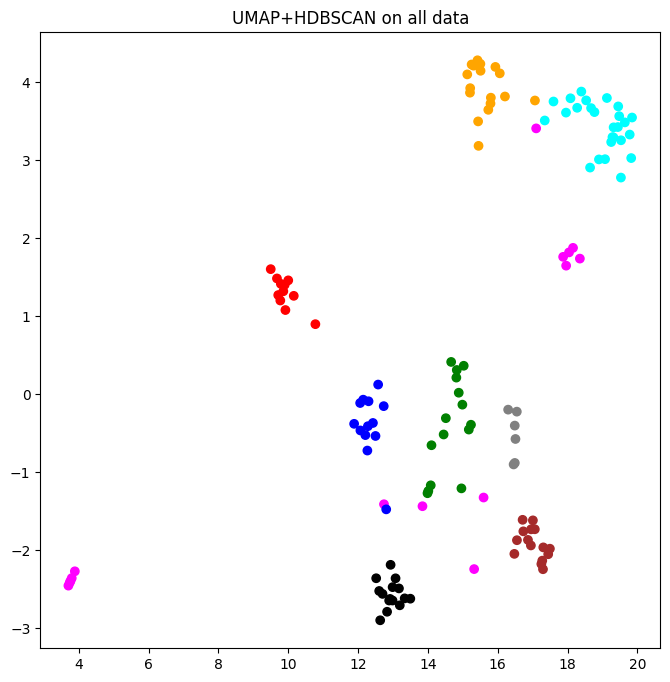

In [ ]:
clusterColor = {-1:"magenta", 0:"red", 1:"green", 2:"blue", 3:"black",
                4:"gray", 5:"brown", 6:"orange", 7:"cyan"}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title("UMAP+HDBSCAN on all data")
plt.show()

In [ ]:
for label in num_clusters:
  cluster = data[data["cluster"] == label]
  c_sub = pd.unique(cluster["Предмет"])
  print("В кластере ", label, "-", len(cluster), "элементов", "\n")
  for i in c_sub:
    print(i)
  print("\n")

В кластере  0 - 11 элементов 

Бизнес и менеджмент в глобальном контексте
Комбинаторика, графы и булева логика
Научно-исследовательский семинар "Анализ данных и искусственный интеллект"
Основные методы анализа данных
Семантические технологии
Анализ и визуализация сетей
Введение в мобильную робототехнику
Научно-исследовательский семинар "Анализ данных и искусственный интеллект 2"
Автоматическая обработка текста
Прикладная теория графов
Инструменты промышленной разработки


В кластере  1 - 15 элементов 

Практикум по математическому анализу 2
Практикум по линейной алгебре 2
Основы компьютерной криминалистики
Практикум по линейной алгебре 1
Дискретная математика (адаптационный курс)
Практикум по математическому анализу 1
Алгоритмы для иерархий памяти
Язык SQL
Архитектура и программирование современных многоядерных процессоров
Продвинутые алгоритмы
Методы разработки программного обеспечения
Системы баз данных
Финтех-тренды
Практикум по имитационному моделированию стохастических систем
Маши

In [ ]:
data = pd.read_csv("Поток 2018.csv")
data = data.rename(columns = {"Unnamed: 0":"Предмет"})
target = data.iloc[:, :1].values
target = np.unique(target)
target_encoded = pd.factorize(target)[0]
data_umap = data.iloc[:, 1:].values

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(embedding)
labels = dbscan.labels_
data["cluster"] = labels
data

,Предмет,0,1,2,3,4,5,6,7,8,...,250,251,252,253,254,255,256,257,258,cluster
0,Алгоритмы и структуры данных,8.0,4.0,7.0,8.0,3.0,4.0,5.0,9.0,6.0,...,9.0,9.0,6.0,7.0,9.0,6.0,8.0,8.0,7.0,0
1,Практикум по математическому анализу 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,-1.0,-1.0,-1.0,-1.0,10.0,10.0,-1.0,-1.0,3
2,Язык Kotlin,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
3,Дополнительные главы линейной алгебры,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
4,Практикум по линейной алгебре 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Теория отказоустойчивых распределенных систем,6.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,9.0,10.0,...,4.0,-1.0,7.0,5.0,10.0,-1.0,-1.0,-1.0,-1.0,1
129,Теория сложных систем,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,10
130,Функциональное программирование,5.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,5
131,Математическая логика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1


In [ ]:
num_clusters = set(labels)
num_clusters

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

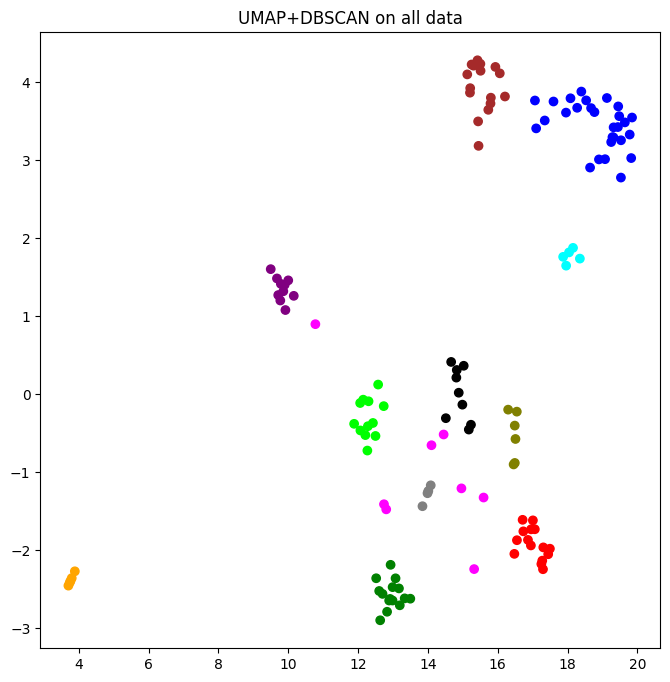

In [ ]:
clusterColor = {-1:"magenta", 0:"red", 1:"green", 2:"blue", 3:"black",
                4:"grey", 5:"brown", 6:"orange", 7:"cyan", 8:"olive",
                9:"purple", 10:"lime"}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title("UMAP+DBSCAN on all data")
plt.show()

In [ ]:
for label in num_clusters:
  cluster = data[data["cluster"] == label]
  c_sub = pd.unique(cluster["Предмет"])
  print("В кластере ", label, "-", len(cluster), "элементов", "\n")
  for i in c_sub:
    print(i)
  print("\n")

В кластере  0 - 15 элементов 

Алгоритмы и структуры данных
Алгебра
Линейная алгебра и геометрия
Математический анализ 1
Архитектура компьютера и операционные системы
Дифференциальные уравнения
Математический анализ 2
Основы и методология программирования
Дискретная математика
Вводный научно-исследовательский семинар
Теория вероятностей и математическая статистика
Введение в глубинное обучение
Дискретная математика 2
Машинное обучение 1
Алгоритмы и структуры данных 2


В кластере  1 - 15 элементов 

Язык Kotlin
Методы и системы обработки больших данных
Теория и практика многопоточной синхронизации
Методы оптимизации
Компьютерные сети
Научно-исследовательский семинар "Распределённые системы"
Распределенные системы
Высокопроизводительные вычисления
Введение в блокчейн
DevOps
Облачные вычисления
Децентрализованные системы
Научно-исследовательский семинар "Распределенные системы 2"
Дизайн систем
Теория отказоустойчивых распределенных систем


В кластере  2 - 28 элементов 

Дополнительные г

UMAP(метрика евклидово расстояние)

In [ ]:
data = pd.read_csv("Поток 2018.csv")
data = data.rename(columns = {"Unnamed: 0":"Предмет"})
target = data.iloc[:, :1].values
target = np.unique(target)
target_encoded = pd.factorize(target)[0]
data_umap = data.iloc[:, 1:].values

In [ ]:
embedding = umap.UMAP().fit_transform(data_umap)
embedding.shape

(133, 2)

In [ ]:
hdb = hdbscan.HDBSCAN()
scoreTitles = hdb.fit(embedding)
labels = scoreTitles.labels_
data["cluster"] = labels
data

,Предмет,0,1,2,3,4,5,6,7,8,...,250,251,252,253,254,255,256,257,258,cluster
0,Алгоритмы и структуры данных,8.0,4.0,7.0,8.0,3.0,4.0,5.0,9.0,6.0,...,9.0,9.0,6.0,7.0,9.0,6.0,8.0,8.0,7.0,1
1,Практикум по математическому анализу 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,-1.0,-1.0,-1.0,-1.0,10.0,10.0,-1.0,-1.0,6
2,Язык Kotlin,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6
3,Дополнительные главы линейной алгебры,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6
4,Практикум по линейной алгебре 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Теория отказоустойчивых распределенных систем,6.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,9.0,10.0,...,4.0,-1.0,7.0,5.0,10.0,-1.0,-1.0,-1.0,-1.0,2
129,Теория сложных систем,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,4
130,Функциональное программирование,5.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,6
131,Математическая логика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6


In [ ]:
num_clusters = set(labels)
num_clusters

{-1, 0, 1, 2, 3, 4, 5, 6}

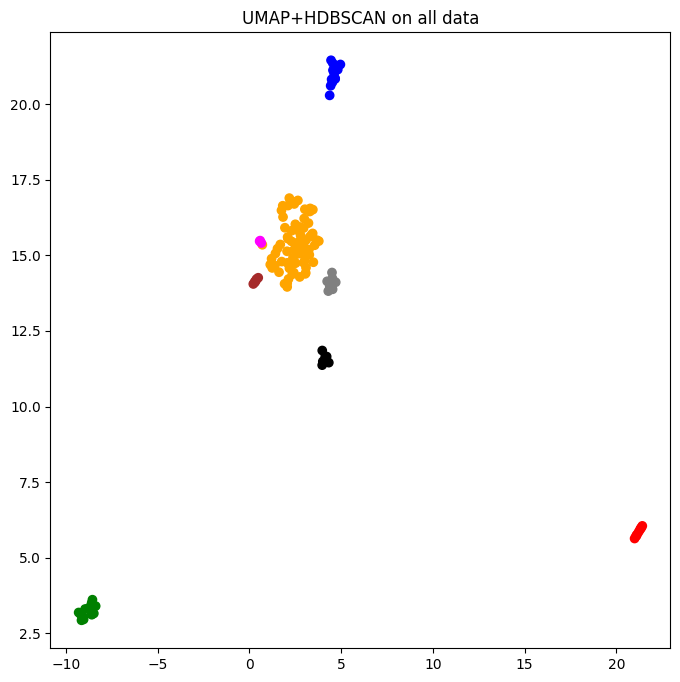

In [ ]:
clusterColor = {-1:"magenta", 0:"red", 1:"green", 2:"blue", 3:"black",
                4:"grey", 5:"brown", 6:"orange"}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title("UMAP+HDBSCAN on all data")
plt.show()

In [ ]:
for label in num_clusters:
  cluster = data[data["cluster"] == label]
  c_sub = pd.unique(cluster["Предмет"])
  print("В кластере ", label, "-", len(cluster), "элементов", "\n")
  for i in c_sub:
    print(i)
  print("\n")

В кластере  0 - 9 элементов 

Машинное обучение 2
Научно-исследовательский семинар "Машинное обучение и приложения"
Прикладная статистика в машинном обучении
Методы оптимизации в машинном обучении
Обучение с подкреплением
Машинное обучение для больших данных
Научно-исследовательский семинар "Машинное обучение и приложения 2"
Глубинное обучение
Глубинное обучение для текстовых данных


В кластере  1 - 15 элементов 

Алгоритмы и структуры данных
Алгебра
Линейная алгебра и геометрия
Математический анализ 1
Архитектура компьютера и операционные системы
Дифференциальные уравнения
Математический анализ 2
Основы и методология программирования
Дискретная математика
Вводный научно-исследовательский семинар
Теория вероятностей и математическая статистика
Введение в глубинное обучение
Дискретная математика 2
Машинное обучение 1
Алгоритмы и структуры данных 2


В кластере  2 - 13 элементов 

Методы и системы обработки больших данных
Теория и практика многопоточной синхронизации
Методы оптимизации


In [ ]:
data = pd.read_csv("Поток 2018.csv")
data = data.rename(columns = {"Unnamed: 0":"Предмет"})
target = data.iloc[:, :1].values
target = np.unique(target)
target_encoded = pd.factorize(target)[0]
data_umap = data.iloc[:, 1:].values

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=4).fit(embedding)
labels = dbscan.labels_
data["cluster"] = labels
data

,Предмет,0,1,2,3,4,5,6,7,8,...,250,251,252,253,254,255,256,257,258,cluster
0,Алгоритмы и структуры данных,8.0,4.0,7.0,8.0,3.0,4.0,5.0,9.0,6.0,...,9.0,9.0,6.0,7.0,9.0,6.0,8.0,8.0,7.0,0
1,Практикум по математическому анализу 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,-1.0,-1.0,-1.0,-1.0,10.0,10.0,-1.0,-1.0,1
2,Язык Kotlin,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
3,Дополнительные главы линейной алгебры,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
4,Практикум по линейной алгебре 2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Теория отказоустойчивых распределенных систем,6.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,9.0,10.0,...,4.0,-1.0,7.0,5.0,10.0,-1.0,-1.0,-1.0,-1.0,2
129,Теория сложных систем,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,7
130,Функциональное программирование,5.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,1
131,Математическая логика,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1


In [ ]:
num_clusters = set(labels)
num_clusters

{0, 1, 2, 3, 4, 5, 6, 7}

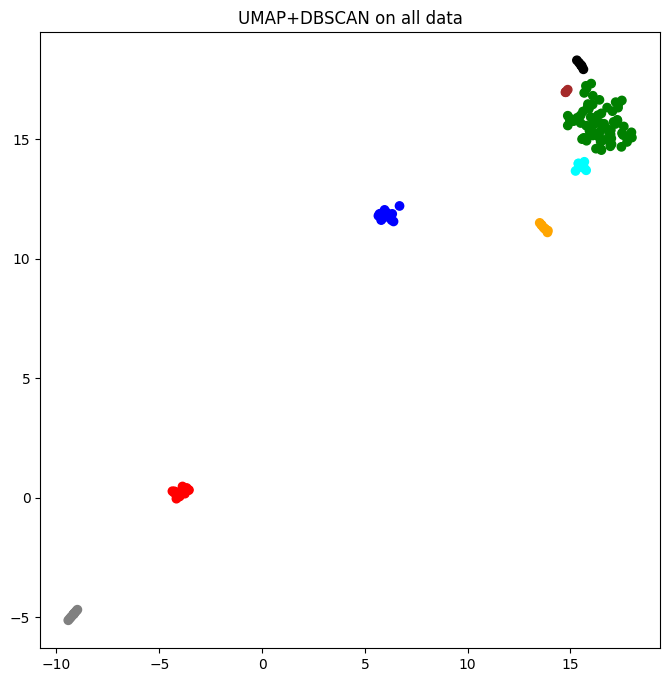

In [ ]:
clusterColor = {-1:"magenta", 0:"red", 1:"green", 2:"blue", 3:"black",
                4:"grey", 5:"brown", 6:"orange", 7:"cyan"}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title("UMAP+DBSCAN on all data")
plt.show()

In [ ]:
for label in num_clusters:
  cluster = data[data["cluster"] == label]
  c_sub = pd.unique(cluster["Предмет"])
  print("В кластере ", label, "-", len(cluster), "элементов", "\n")
  for i in c_sub:
    print(i)
  print("\n")

В кластере  0 - 15 элементов 

Алгоритмы и структуры данных
Алгебра
Линейная алгебра и геометрия
Математический анализ 1
Архитектура компьютера и операционные системы
Дифференциальные уравнения
Математический анализ 2
Основы и методология программирования
Дискретная математика
Вводный научно-исследовательский семинар
Теория вероятностей и математическая статистика
Введение в глубинное обучение
Дискретная математика 2
Машинное обучение 1
Алгоритмы и структуры данных 2


В кластере  1 - 69 элементов 

Практикум по математическому анализу 2
Язык Kotlin
Дополнительные главы линейной алгебры
Практикум по линейной алгебре 2
Практические задачи машинного обучения
Основы компьютерной криминалистики
Введение в блокчейн и разработка на Solidity
Дополнительные главы дискретной математики 2
Функциональный анализ
Теория вероятности и математическая статистика
Подготовка к студенческим олимпиадам по программированию
Введение в лингвистику
Дискретная математика - 2
Практикум по линейной алгебре 1
Доп